In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!pip install monai==1.3.0 nibabel SimpleITK scikit-learn pandas matplotlib
!pip install itk
!pip install -q monai[itk] SimpleITK itk

Mounted at /content/drive
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 MB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 87.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 63.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 46.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 87.5 MB/s eta 0:00:00
  Attempting uninstal

In [ ]:
!ls /content/drive/MyDrive/

'1. Microprocessor complete class note (1).pdf'
'1. Microprocessor complete class note.pdf'
'Ai ut solution.pdf'
'Auto_CatalystReport 1.pdf'
'Capacitor pdf manual.pdf'
 Classroom
'Colab Notebooks'
'Compressed Compressed Ai assessment solu (1).pdf'
'Compressed Compressed Ai assessment solu.pdf'
'edc set 020324.pdf'
'F05-1-Product Backlog Jestate Client-A Real State System V2.0.gsheet'
 lab-Report1.docx
 Labsheet0.docx
 Labsheet0.gdoc
 labsheet2_false_position.docx
 labsheet3_newton_rhapson.docx
 labsheet4_secant_method.docx
 labsheet5_Gauss_method.docx
 labsheet6gauss_seidel.docx
'microprocessor ioe full note-tuts by er. hari aryaल.pdf'
 OStutorial.pdf
'programming for everybody(Python).pdf'
 prostate_project
 tutorial-4.pdf


In [ ]:
!pip install SimpleITK

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models, transforms
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder

from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [ ]:
# 1. Setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
# 2. Data transforms
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

In [ ]:
import os

# 3. Path setup
project_root = "/content/drive/MyDrive/prostate_project"
images_dir = os.path.join(project_root, "mri_images")
clinical_data_path = os.path.join(project_root, "marksheet.csv")

In [ ]:
import pandas as pd
import os

# 4. Load clinical data
clinical_data_path = os.path.join(project_root, "marksheet.csv")
clinical_df = pd.read_csv(clinical_data_path)

# Convert 'YES' and 'NO' to 1.0 and 0.0
clinical_df['case_csPCa'] = clinical_df['case_csPCa'].map({'YES': 1.0, 'NO': 0.0})

# Displaying the first few rows and data types to verify
display(clinical_df.head())
display(clinical_df.info())

,patient_id,study_id,mri_date,patient_age,psa,psad,prostate_volume,histopath_type,lesion_GS,lesion_ISUP,case_ISUP,case_csPCa,center
0,10000,1000000,2019-07-02,73,7.7,NaN,55.0,MRBx,0+0,0,0,0.0,PCNN
1,10001,1000001,2016-05-27,64,8.7,0.09,102.0,NaN,NaN,NaN,0,0.0,RUMC
2,10002,1000002,2021-04-18,58,4.2,0.06,74.0,NaN,NaN,NaN,0,0.0,ZGT
3,10003,1000003,2019-04-05,72,13.0,NaN,71.5,SysBx,0+0,0,0,0.0,ZGT
4,10004,1000004,2020-10-21,67,8.0,0.10,78.0,SysBx+MRBx,"0+0,0+0","0,0",0,0.0,RUMC


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   patient_id       1500 non-null   int64  
 1   study_id         1500 non-null   int64  
 2   mri_date         1500 non-null   object 
 3   patient_age      1500 non-null   int64  
 4   psa              1460 non-null   float64
 5   psad             1049 non-null   float64
 6   prostate_volume  1473 non-null   float64
 7   histopath_type   1001 non-null   object 
 8   lesion_GS        1001 non-null   object 
 9   lesion_ISUP      1001 non-null   object 
 10  case_ISUP        1500 non-null   int64  
 11  case_csPCa       1500 non-null   float64
 12  center           1500 non-null   object 
dtypes: float64(4), int64(4), object(5)
memory usage: 152.5+ KB


None

In [ ]:
import os
from sklearn.model_selection import train_test_split
# 5. data list and training and testing cases

data_list = []
for idx, row in clinical_df.iterrows():
    pid = str(row["patient_id"])
    folder = os.path.join(images_dir, pid)
    if not os.path.exists(folder):
        continue
    all_files = os.listdir(folder)
    try:
        t2w = [f for f in all_files if "t2w" in f.lower()][0]
        t2w_path = os.path.join(folder, t2w)
    except:
        # This patient folder does not contain a T2W image with "t2w" in the filename
        continue

    label = row["case_csPCa"]
    if os.path.exists(t2w_path):
        data_list.append({"t2w": t2w_path, "label": label})

print(f"Total usable cases: {len(data_list)}")
if data_list:
    train_data, test_data = train_test_split(data_list, test_size=0.2, random_state=42, stratify=[d["label"] for d in data_list])
    print(f"Train: {len(train_data)} | Test: {len(test_data)}")

Total usable cases: 1500
Train: 1200 | Test: 300


In [ ]:
import tensorflow as tf
import SimpleITK as sitk
import numpy as np

# 6. Function to load and preprocess a single image
def load_and_preprocess_image_tf(file_path):
    # Load the middle slice using SimpleITK
    img = sitk.ReadImage(file_path.numpy().decode('utf-8'))
    array = sitk.GetArrayFromImage(img)
    mid_slice = array[array.shape[0] // 2]
    image = mid_slice.astype(np.float32)

    # Ensure image has 3 channels (convert grayscale to RGB)
    if len(image.shape) == 2:
        image = np.expand_dims(image, axis=-1)  # (H, W, 1)
        image = np.repeat(image, 3, axis=-1)    # (H, W, 3)
    elif image.shape[2] == 1:
         image = np.repeat(image, 3, axis=-1)    # (H, W, 3)

    # Convert numpy array to TensorFlow tensor
    image = tf.convert_to_tensor(image, dtype=tf.float32)

    # Resize and normalize (using TensorFlow operations)
    image = tf.image.resize(image, (299, 299)) # Xception default input size
    image = image / 255.0 # Simple scaling

    return image

# 7. Create TensorFlow Datasets
train_image_paths = [d["t2w"] for d in train_data]
train_labels = [d["label"] for d in train_data]

test_image_paths = [d["t2w"] for d in test_data]
test_labels = [d["label"] for d in test_data]

train_dataset = tf.data.Dataset.from_tensor_slices((train_image_paths, train_labels))
test_dataset = tf.data.Dataset.from_tensor_slices((test_image_paths, test_labels))

# Map the preprocessing function to the datasets
train_dataset = train_dataset.map(lambda x, y: (tf.py_function(func=load_and_preprocess_image_tf, inp=[x], Tout=tf.float32), y))
test_dataset = test_dataset.map(lambda x, y: (tf.py_function(func=load_and_preprocess_image_tf, inp=[x], Tout=tf.float32), y))

# Set the shape of the images (tf.py_function can lose shape information)
def set_shape(image, label):
    image.set_shape((299, 299, 3))
    return image, label

train_dataset = train_dataset.map(set_shape)
test_dataset = test_dataset.map(set_shape)


# Batch the datasets
BATCH_SIZE = 8
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(buffer_size=tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(buffer_size=tf.data.AUTOTUNE)

print("TensorFlow Datasets created.")

TensorFlow Datasets created.


In [ ]:
!pip install timm

In [ ]:
from tensorflow.keras.applications import Xception
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input
from tensorflow.keras.optimizers import Adam

# 8. Xception base
base_model = Xception(
    include_top=False,
    weights="imagenet",
    input_tensor=Input(shape=(299, 299, 3))
)
base_model.trainable = False  # freeze feature extractor

# Custom classifier
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(64, activation="relu")(x)
output = Dense(2, activation="softmax")(x)  # 2-class classification

model = Model(inputs=base_model.input, outputs=output)

# Compile
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss="sparse_categorical_crossentropy",  # for integer labels 0/1
    metrics=["accuracy"]
)

model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 299, 299,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1        │ (None, 149, 149,  │        864 │ input_layer_1[0]… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_bn     │ (None, 149, 149,  │        128 │ block1_conv1[0][… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_act    │ (None, 149, 149,  │          0 │ block1_conv1_bn[… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2        │ (None, 147, 147,  │     18,432 │ block1_conv1_act… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_bn     │ (None, 147, 147,  │        256 │ block1_conv2[0][… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_act    │ (None, 147, 147,  │          0 │ block1_conv2_bn[… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1     │ (None, 147, 147,  │      8,768 │ block1_conv2_act… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1_bn  │ (None, 147, 147,  │        512 │ block2_sepconv1[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_act │ (None, 147, 147,  │          0 │ block2_sepconv1_… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2     │ (None, 147, 147,  │     17,536 │ block2_sepconv2_… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_bn  │ (None, 147, 147,  │        512 │ block2_sepconv2[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 74, 74,    │      8,192 │ block1_conv2_act… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_pool         │ (None, 74, 74,    │          0 │ block2_sepconv2_… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 74, 74,    │        512 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_12 (Add)        │ (None, 74, 74,    │          0 │ block2_pool[0][0… │
│                     │ 128)              │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_sepconv1_act │ (None, 74, 74,    │          0 │ add_12[0][0]    

 Total params: 20,992,746 (80.08 MB)

 Trainable params: 131,266 (512.76 KB)

 Non-trainable params: 20,861,480 (79.58 MB)

In [ ]:
# 9. training
history = model.fit(
    train_dataset,       # a tf.data.Dataset or ImageDataGenerator
    validation_data=test_dataset, # Use test_dataset for validation
    epochs=10
)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_135']
Received: inputs=Tensor(shape=(None, 299, 299, 3))
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_135']
Received: inputs=Tensor(shape=(None, 299, 299, 3))
  warnings.warn(msg)


150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 11s/step - accuracy: 0.7130 - loss: 0.5999 

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_135']
Received: inputs=Tensor(shape=(None, 299, 299, 3))
  warnings.warn(msg)


150/150 ━━━━━━━━━━━━━━━━━━━━ 1819s 12s/step - accuracy: 0.7130 - loss: 0.5999 - val_accuracy: 0.7333 - val_loss: 0.5781
Epoch 2/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 876s 6s/step - accuracy: 0.7164 - loss: 0.5613 - val_accuracy: 0.7600 - val_loss: 0.5729
Epoch 3/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 936s 6s/step - accuracy: 0.7333 - loss: 0.5424 - val_accuracy: 0.7333 - val_loss: 0.5766
Epoch 4/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 894s 6s/step - accuracy: 0.7519 - loss: 0.5264 - val_accuracy: 0.7333 - val_loss: 0.5780
Epoch 5/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 851s 6s/step - accuracy: 0.7596 - loss: 0.5130 - val_accuracy: 0.7233 - val_loss: 0.5804
Epoch 6/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 857s 6s/step - accuracy: 0.7650 - loss: 0.5001 - val_accuracy: 0.7167 - val_loss: 0.5838
Epoch 7/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 847s 6s/step - accuracy: 0.7839 - loss: 0.4868 - val_accuracy: 0.7100 - val_loss: 0.5847
Epoch 8/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 830s 5s/step - accuracy: 0.7940 - loss: 0.4742 - val_accuracy: 0.6

Evaluating model...
38/38 ━━━━━━━━━━━━━━━━━━━━ 160s 4s/step
Shape of true_labels: (300,)
Dtype of true_labels: int64
Shape of predicted_labels: (300,)
Dtype of predicted_labels: int64
Test Accuracy: 0.6833


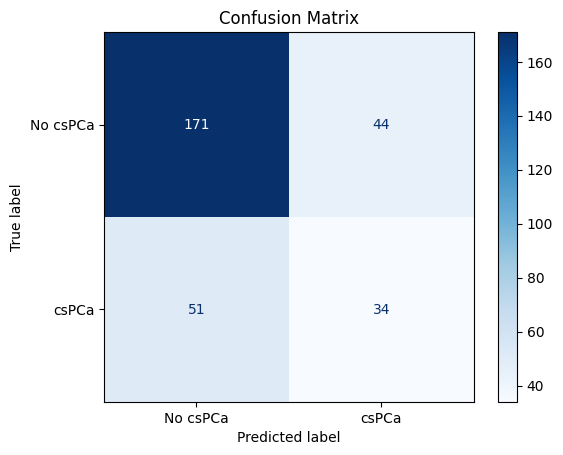


Model evaluation finished.


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# 10. Evaluate Model
print("Evaluating model...")
# Predict probabilities on the test set
predictions = model.predict(test_dataset)

# Convert predicted probabilities (from softmax output) to class labels (0 or 1)
predicted_labels = np.argmax(predictions, axis=1)

# Get the true labels from the test dataset
true_labels = np.concatenate([y for x, y in test_dataset], axis=0)

# Convert true labels to integer type
true_labels = true_labels.astype(int)

# Add print statements for debugging
print(f"Shape of true_labels: {true_labels.shape}")
print(f"Dtype of true_labels: {true_labels.dtype}")
print(f"Shape of predicted_labels: {predicted_labels.shape}")
print(f"Dtype of predicted_labels: {predicted_labels.dtype}")

# Calculate Accuracy
accuracy = accuracy_score(true_labels, predicted_labels)
print(f"Test Accuracy: {accuracy:.4f}")

# Generate Confusion Matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Display Confusion Matrix
disp = ConfusionMatrixDisplay(
  confusion_matrix=cm,
  display_labels=["No csPCa", "csPCa"]
  )
disp.plot(cmap="Blues")
plt.title('Confusion Matrix')
plt.show()

print("\nModel evaluation finished.")